# Financial Sentiment Analysis

In [1]:
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [2]:



#import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer


# Download stopwords and punkt if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
# Download the 'wordnet' corpus
nltk.download('wordnet')

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [3]:
# Load Financial Data
financial_df = pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv')
financial_df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [4]:
financial_df.columns

Index(['Sentence', 'Sentiment'], dtype='object')

The dataset has 5842 samples. The dataset is single class, meaning each sentence has a single sentiment associated with it (Positive, Neutral, Negative).

### Data Visualization

In [5]:
# df shape and size
print('Training Set Shape = {}'.format(financial_df.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(financial_df.memory_usage().sum() / 1024**2))

Training Set Shape = (5842, 2)
Training Set Memory Usage = 0.09 MB


0


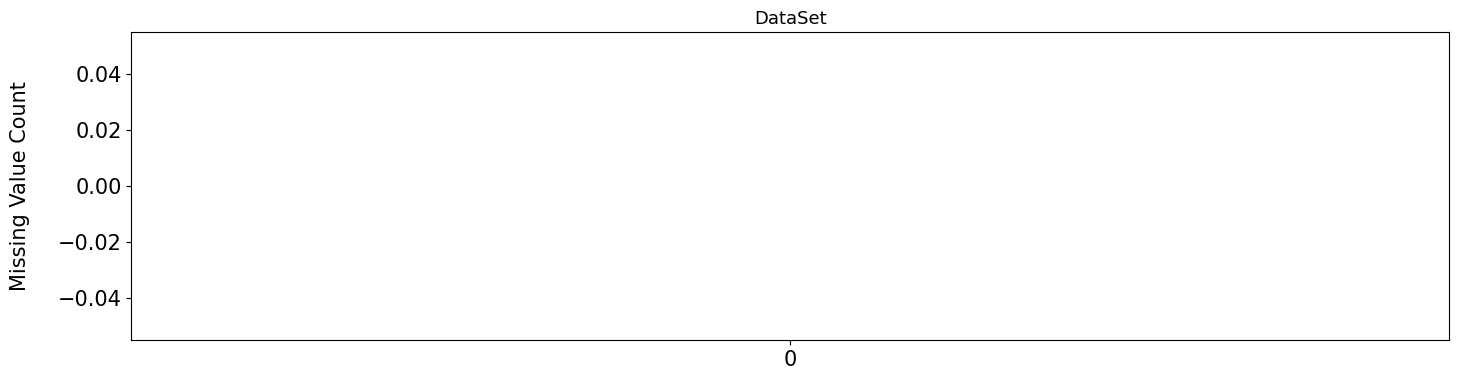

In [6]:
missing_cols = ['Sentence', 'Sentiment']


print(financial_df["Sentence"].isnull().sum())

fig, axes = plt.subplots(ncols=1, figsize=(17, 4), dpi=100)

sns.barplot(x=financial_df[missing_cols].isnull().sum(), y=financial_df[missing_cols].isnull().sum().values, ax=axes)
# sns.barplot(x=df_test[missing_cols].isnull().sum().index, y=df_test[missing_cols].isnull().sum().values, ax=axes[1])

axes.set_ylabel('Missing Value Count', size=15, labelpad=20)
axes.tick_params(axis='x', labelsize=15)
axes.tick_params(axis='y', labelsize=15)
# axes[1].tick_params(axis='x', labelsize=15)
# axes[1].tick_params(axis='y', labelsize=15)

axes.set_title('DataSet', fontsize=13)
# axes[1].set_title('Test Set', fontsize=13)

plt.show()

for col in ['Sentence', 'Sentiment']:
    financial_df[col] = financial_df[col].fillna(f'no_{col}')

The dataset has no missing values in any of its columns. We can proceed towards visualizing the data distribution.

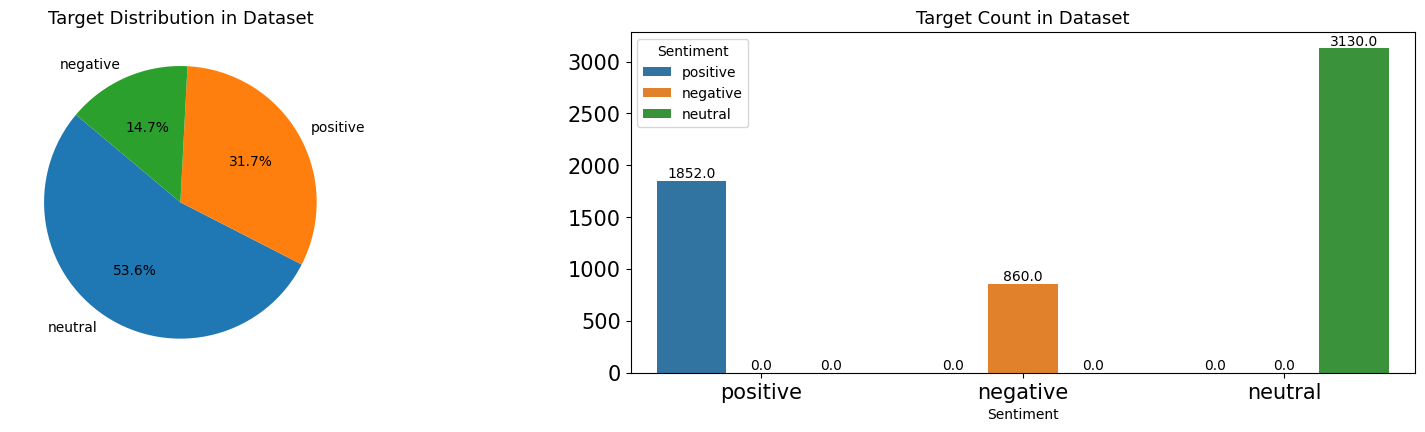

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

financial_df['Sentiment'].value_counts().plot(kind='pie', ax=axes[0],
                                              autopct='%1.1f%%', startangle=140)
bar_plot = sns.countplot(x=financial_df['Sentiment'], hue=financial_df['Sentiment'], ax=axes[1])

# Annotate bars with counts
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points', ha='center', va='center')

# Customize tick parameters

axes[0].set_ylabel('')
axes[1].set_ylabel('')
# axes[1].set_xticklabels(['Positive', 'Neutral', 'Negative'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()


There is a class imbalance in the dataset, as the **"Neutral"** class dominates the distribution in the dataset. **"Negative"** class has the least samples.

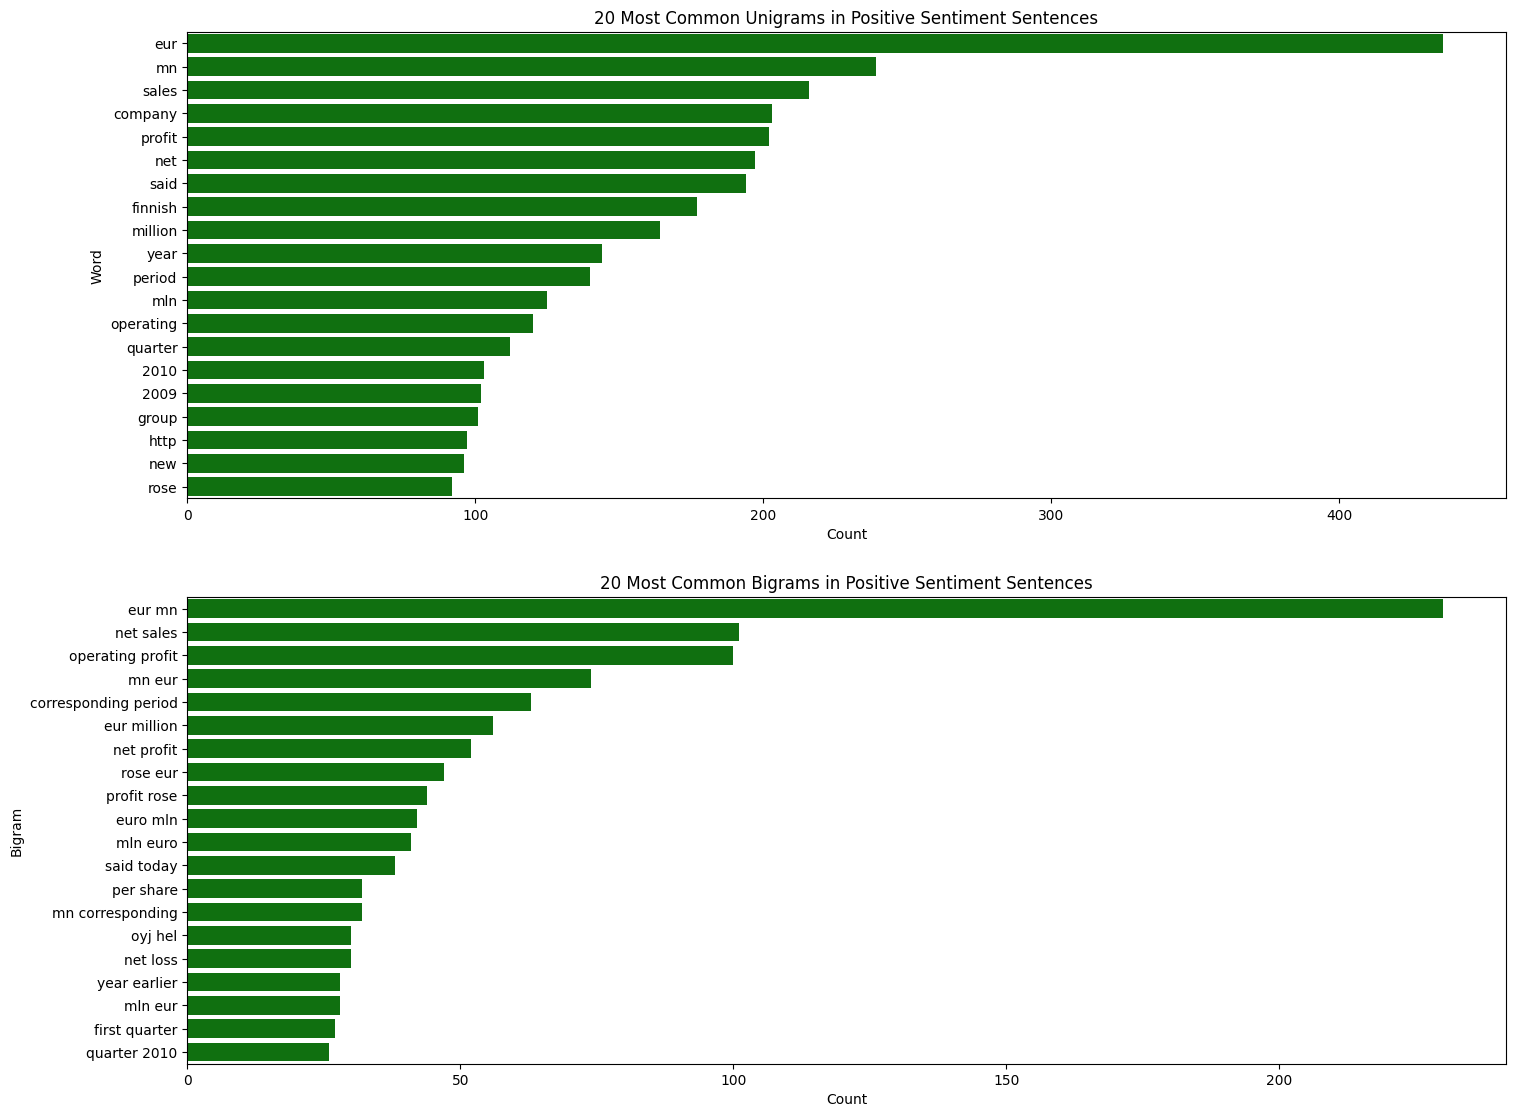

In [8]:
#Global variable to control how many number of most frequently occuring words to plot for each sentiment
MOST_FREQUENT_SENTENCES:int = 20
    
# Filter the sentences with Positive sentiment
positive_sentences = financial_df[financial_df['Sentiment'] == 'positive']['Sentence']

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
positive_words = []
positive_bigrams = []

for sentence in positive_sentences:
    words = word_tokenize(sentence.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    positive_words.extend(filtered_words)
    positive_bigrams.extend(ngrams(filtered_words, 2))

# Get the 50 most common unigrams
unigram_counts = Counter(positive_words)
common_unigrams = unigram_counts.most_common(MOST_FREQUENT_SENTENCES)

# Get the 50 most common bigrams
bigram_counts = Counter(positive_bigrams)
common_bigrams = bigram_counts.most_common(MOST_FREQUENT_SENTENCES)

# Convert to DataFrame for plotting
unigrams_df = pd.DataFrame(common_unigrams, columns=['Word', 'Count'])
bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

# Plot horizontal bar charts in subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), dpi=100)
plt.tight_layout(pad=5.0)

# Unigrams plot
sns.barplot(x='Count', y='Word', data=unigrams_df, ax=axes[0], color='green')
axes[0].set_title(str(MOST_FREQUENT_SENTENCES)+' Most Common Unigrams in Positive Sentiment Sentences')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')

# Bigrams plot
sns.barplot(x='Count', y='Bigram', data=bigrams_df, ax=axes[1], color='green')
axes[1].set_title(str(MOST_FREQUENT_SENTENCES)+' Most Common Bigrams in Positive Sentiment Sentences')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Bigram')

plt.show()

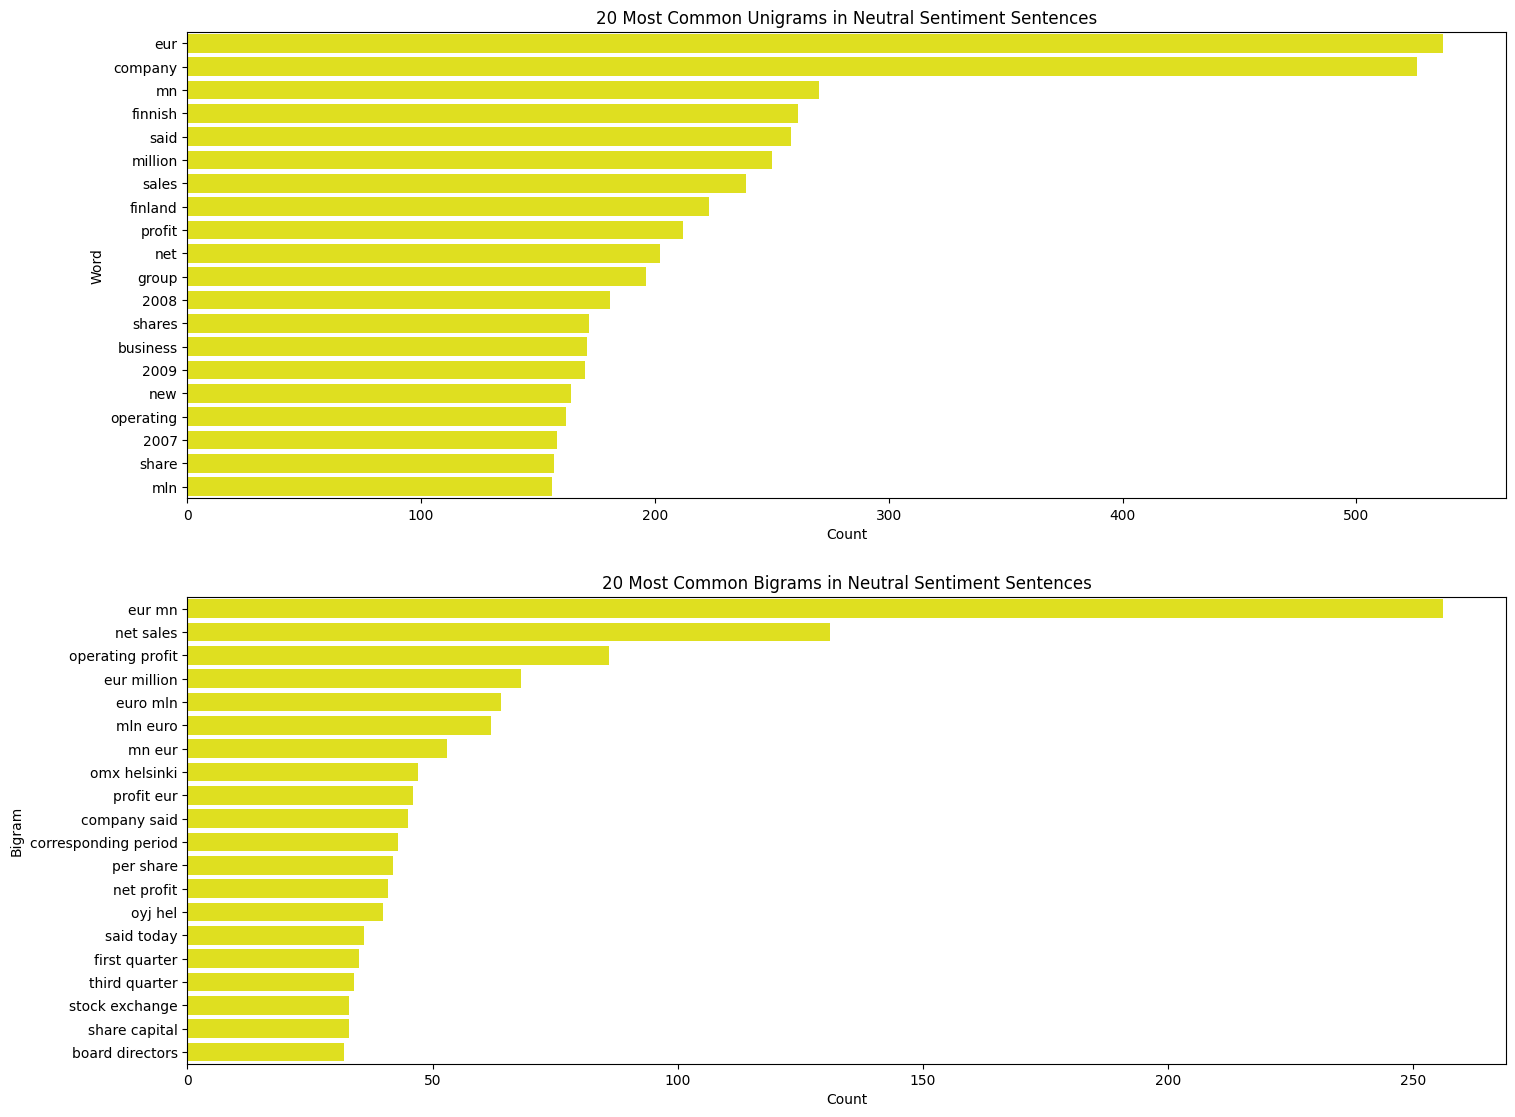

In [9]:
# Filter the sentences with Neutral sentiment
neutral_sentences = financial_df[financial_df['Sentiment'] == 'neutral']['Sentence']

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
neutral_words = []
neutral_bigrams = []

for sentence in neutral_sentences:
    words = word_tokenize(sentence.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    neutral_words.extend(filtered_words)
    
    # Handle empty filtered words for bigrams
    if len(filtered_words) > 1:
        neutral_bigrams.extend(ngrams(filtered_words, 2))

# Get the 50 most common unigrams
unigram_counts = Counter(neutral_words)
common_unigrams = unigram_counts.most_common(MOST_FREQUENT_SENTENCES)

# Get the 50 most common bigrams
bigram_counts = Counter(neutral_bigrams)
common_bigrams = bigram_counts.most_common(MOST_FREQUENT_SENTENCES)

# Convert to DataFrame for plotting
unigrams_df = pd.DataFrame(common_unigrams, columns=['Word', 'Count'])
bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

# Plot horizontal bar charts in subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), dpi=100)
plt.tight_layout(pad=5.0)

# Unigrams plot
sns.barplot(x='Count', y='Word', data=unigrams_df, ax=axes[0], color='yellow')
axes[0].set_title(str(MOST_FREQUENT_SENTENCES)+' Most Common Unigrams in Neutral Sentiment Sentences')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')

# Bigrams plot
sns.barplot(x='Count', y='Bigram', data=bigrams_df, ax=axes[1], color='yellow')
axes[1].set_title(str(MOST_FREQUENT_SENTENCES)+' Most Common Bigrams in Neutral Sentiment Sentences')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Bigram')

plt.show()

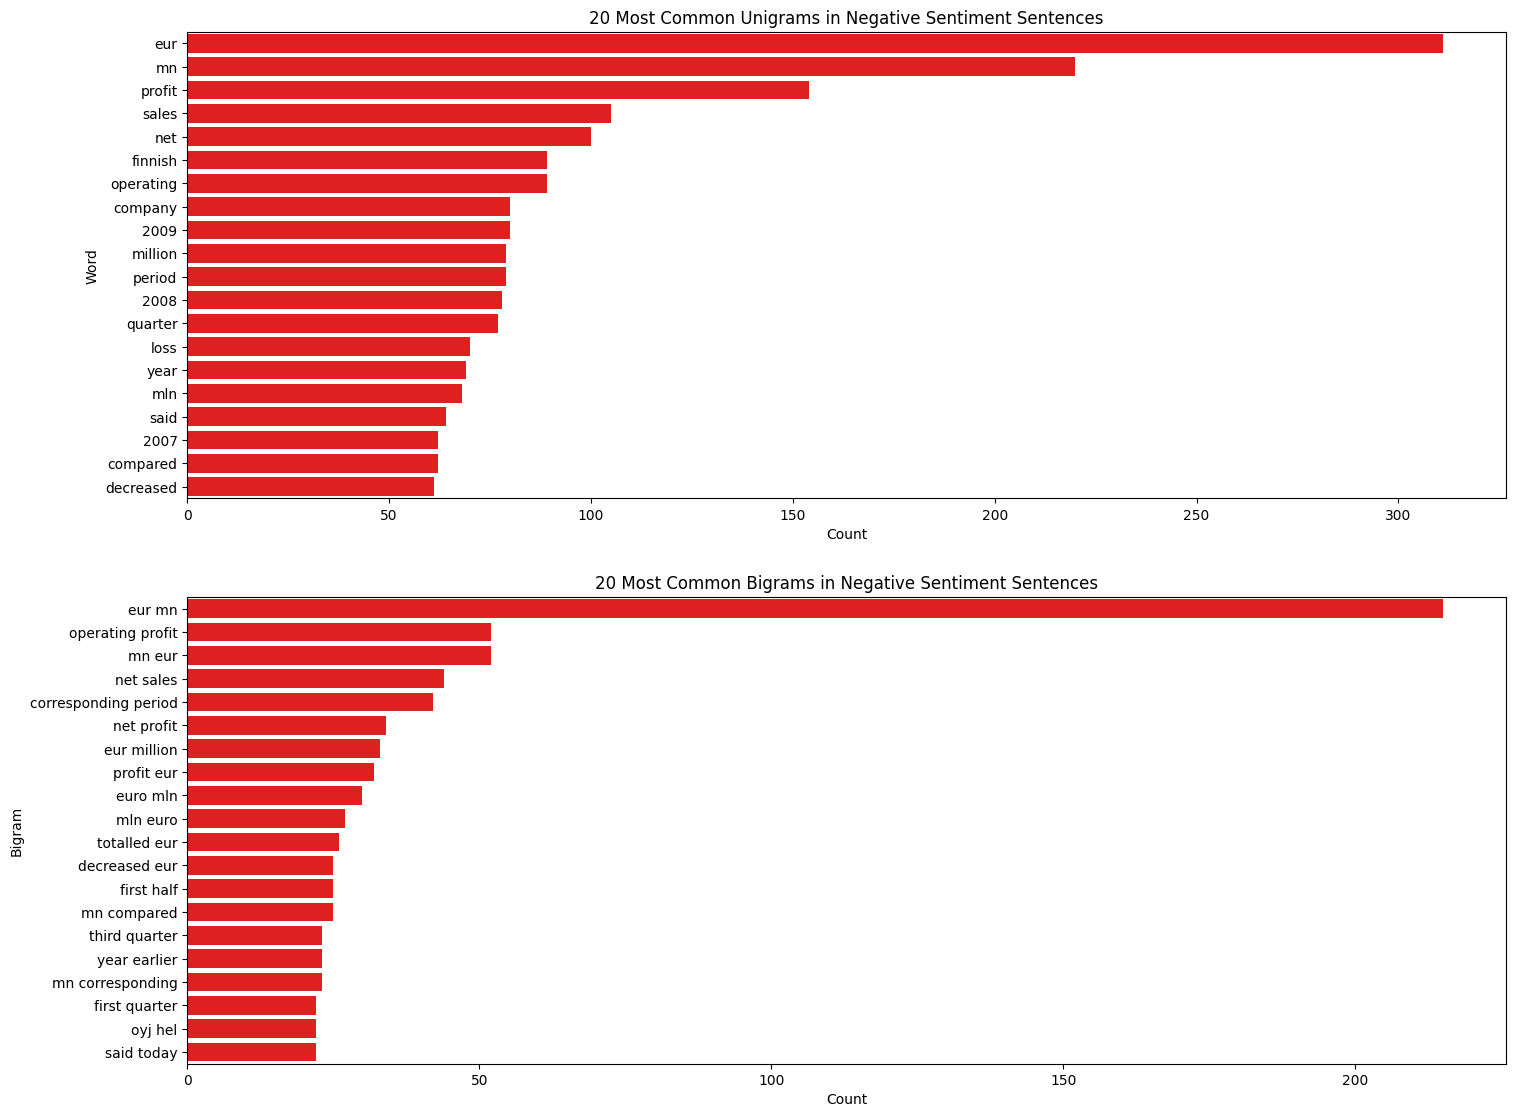

In [10]:
# Filter the sentences with Negative sentiment
negative_sentences = financial_df[financial_df['Sentiment'] == 'negative']['Sentence']

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
negative_words = []
negative_bigrams = []

for sentence in negative_sentences:
    words = word_tokenize(sentence.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    negative_words.extend(filtered_words)
    
    # Handle empty filtered words for bigrams
    if len(filtered_words) > 1:
        negative_bigrams.extend(ngrams(filtered_words, 2))

# Get the 50 most common unigrams
unigram_counts = Counter(negative_words)
common_unigrams = unigram_counts.most_common(MOST_FREQUENT_SENTENCES)

# Get the 50 most common bigrams
bigram_counts = Counter(negative_bigrams)
common_bigrams = bigram_counts.most_common(MOST_FREQUENT_SENTENCES)

# Convert to DataFrame for plotting
unigrams_df = pd.DataFrame(common_unigrams, columns=['Word', 'Count'])
bigrams_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

# Plot horizontal bar charts in subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), dpi=100)
plt.tight_layout(pad=5.0)

# Unigrams plot
sns.barplot(x='Count', y='Word', data=unigrams_df, ax=axes[0], color='red')
axes[0].set_title(str(MOST_FREQUENT_SENTENCES)+' Most Common Unigrams in Negative Sentiment Sentences')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')

# Bigrams plot
sns.barplot(x='Count', y='Bigram', data=bigrams_df, ax=axes[1], color='red')
axes[1].set_title(str(MOST_FREQUENT_SENTENCES)+' Most Common Bigrams in Negative Sentiment Sentences')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Bigram')

plt.show()

## Data Splitting

The dataset is imbalanced so creating stratified splits in order to ensure consistency among the different splits with respect to the dataset class distribution

In [11]:
# Splitting based on class distribution
train_val, test_df = train_test_split(financial_df, test_size=0.2, stratify=financial_df['Sentiment'], random_state=42)
train_df, val_df = train_test_split(train_val, test_size=0.2, stratify=train_val['Sentiment'], random_state=42)

# Displaying class distribution in splits
print("Training Set Class Distribution:")
print(train_df['Sentiment'].value_counts(normalize=True))
print("\nValidation Set Class Distribution:")
print(val_df['Sentiment'].value_counts(normalize=True))
print("\nTest Set Class Distribution:")
print(test_df['Sentiment'].value_counts(normalize=True))

Training Set Class Distribution:
Sentiment
neutral     0.535848
positive    0.317014
negative    0.147138
Name: proportion, dtype: float64

Validation Set Class Distribution:
Sentiment
neutral     0.535829
positive    0.316578
negative    0.147594
Name: proportion, dtype: float64

Test Set Class Distribution:
Sentiment
neutral     0.535500
positive    0.317365
negative    0.147134
Name: proportion, dtype: float64


# Data Processing

The data in train,test, and val splits needs to be processed. Special characters, extra whitespaces, stopwords and punctuation needs to be catered to to retrieve a processed text for training.

In [12]:

def preprocess_text(text):
#     print(type(text))
    # Step 1: Lowercasing
    text = text.lower()
    
    def remove_extra_spaces(text):
        # Replace one or more non-letter characters with a single space
        text = re.sub(r'[^A-Za-z]+', ' ', text)
        # Strip leading and trailing spaces
        text = text.strip()
        # Replace multiple spaces with a single space
        text = re.sub(r'\s+', ' ', text)
        return text

    text = remove_extra_spaces(text)

    # Step 2: Tokenization
    tokens = word_tokenize(text)

    # Step 3: Removing special characters and numbers
    tokens = [re.sub(r'[^A-Za-z]+', '', token) for token in tokens if token.isalnum()]

    # Step 4: Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Step 5: Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Step 6: Joining tokens back into a processed text
    processed_text = ' '.join(tokens)
    
    return processed_text


In [13]:
# Apply preprocessing function to each row in the 'sentence' column
train_df['Sentence'] = train_df['Sentence'].apply(preprocess_text)
val_df['Sentence'] = val_df['Sentence'].apply(preprocess_text)
test_df['Sentence'] = test_df['Sentence'].apply(preprocess_text)


In [14]:
train_df["Sentence"]

3097    digia also set two subsidiary digia norway dig...
5048    bbry sierra great cash balance impressive grow...
5727        britain ftse gain land security dividend hike
185     finnish company sold uk operation consisting s...
4265    russian medium venture minority shareholder pe...
                              ...                        
326                                 h move enhance growth
2821    addition employee laid notice whole workforce ...
4365    paper industry de inking sludge produced mill ...
1603    je look like bouncing would nice finish today ...
200     survey conducted taloustutkimus sampo life sho...
Name: Sentence, Length: 3738, dtype: object

In [15]:
val_df["Sentence"]

3407    nordea chairman board han dalborg informed nom...
2288                      asian traffic declined per cent
2643    telecom foreign investment limit appears mobil...
4922    finnish financial group aktia operating profit...
5483    test conducted nokia siemens lte center compet...
                              ...                        
2026     synergy benefit start materialise second quarter
3890    transaction positive impact around eur earning...
1962    joint venture planning quick timetable negotia...
1894    commented time embrace dividend growth http co...
300     agreement benefon forthcoming range twig integ...
Name: Sentence, Length: 935, dtype: object

In [16]:
test_df["Sentence"]

2129    nordic business report june metso corporation ...
5431    omeo www omeo se employ expects net sale mln e...
1330                q profit tax amounted eur mn eur mn q
1399                          rad chart flashing oversold
1942    operating loss landed eur including one offs e...
                              ...                        
3823                    short faz know mean market tank p
51      august october company result tax totalled eur...
4222    respect decision discussion closed said kai te...
2958                 total investment expected amount eur
772     marimekko make sort colorful little impulse bu...
Name: Sentence, Length: 1169, dtype: object

In [17]:

# Verification functions

def verify_lowercase(text):
    return text == text.lower()

def verify_urls_removed(text):
    return not bool(re.search(r'http\S+|www\S+|https\S+', text))

def verify_special_characters_removed(text):
    return bool(re.search(r'[^A-Za-z]+', text))

def verify_numbers_removed(text):
    return not bool(re.search(r'\d', text))

def verify_extra_whitespaces_removed(text):
    return not bool(re.search(r'\s{2,}', text))

def verify_stopwords_removed(text):
    words = text.split()
    return all(word not in stop_words for word in words)

def verify_lemmatization(text):
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return words == lemmatized

# Verification function
def verify_cleaned_text(text):
    checks = {
        "Lowercase conversion": verify_lowercase(text),
        "URLs removed": verify_urls_removed(text),
        "Special characters removed": verify_special_characters_removed(text),
        "Numbers removed": verify_numbers_removed(text),
        "Extra whitespaces removed": verify_extra_whitespaces_removed(text),
        "Stopwords removed": verify_stopwords_removed(text),
        "Lemmatization": verify_lemmatization(text),
    }
    return checks



In [18]:
train_data_verification_results = train_df['Sentence'].apply(verify_cleaned_text)
# Convert verification results to DataFrame
train_data_verification_df = pd.DataFrame(train_data_verification_results.tolist())

train_data_verification_df

,Lowercase conversion,URLs removed,Special characters removed,Numbers removed,Extra whitespaces removed,Stopwords removed,Lemmatization
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
3733,True,True,True,True,True,True,True
3734,True,True,True,True,True,True,True
3735,True,True,True,True,True,True,True
3736,True,True,True,True,True,True,True


In [19]:
val_data_verification_results = val_df['Sentence'].apply(verify_cleaned_text)
# Convert verification results to DataFrame
val_data_verification_df = pd.DataFrame(val_data_verification_results.tolist())

val_data_verification_df

,Lowercase conversion,URLs removed,Special characters removed,Numbers removed,Extra whitespaces removed,Stopwords removed,Lemmatization
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
930,True,True,True,True,True,True,True
931,True,True,True,True,True,True,True
932,True,True,True,True,True,True,True
933,True,True,True,True,True,True,True


In [20]:
test_data_verification_results = test_df['Sentence'].apply(verify_cleaned_text)
# Convert verification results to DataFrame
test_data_verification_df = pd.DataFrame(test_data_verification_results.tolist())

test_data_verification_df

,Lowercase conversion,URLs removed,Special characters removed,Numbers removed,Extra whitespaces removed,Stopwords removed,Lemmatization
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1164,True,True,True,True,True,True,True
1165,True,True,True,True,True,True,True
1166,True,True,True,True,True,True,True
1167,True,True,True,True,True,True,True


# Data Loading

Now we have to prepare dataset object in order to load the data into Huggingface pipeline

In [21]:
from datasets import Dataset, DatasetDict

# Define the mapping from text labels to numerical labels
label_mapping = {'positive': 1, 'negative': 0, "neutral":2}

# Convert the 'Sentiment' column to numeric values
train_df['label'] = train_df['Sentiment'].map(label_mapping)
val_df['label'] = val_df['Sentiment'].map(label_mapping)
test_df['label'] = test_df['Sentiment'].map(label_mapping)

# Drop the original Sentiment column
train_df = train_df.drop(columns=['Sentiment'])
val_df = val_df.drop(columns=['Sentiment'])
test_df = test_df.drop(columns=['Sentiment'])


# Convert DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)



# Create a DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})


In [22]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Sentence', 'label', '__index_level_0__'],
        num_rows: 3738
    })
    validation: Dataset({
        features: ['Sentence', 'label', '__index_level_0__'],
        num_rows: 935
    })
    test: Dataset({
        features: ['Sentence', 'label', '__index_level_0__'],
        num_rows: 1169
    })
})

Load the model and prepare the dataloaders and DataCollators for the training pipeline

In [29]:
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Initialize the tokenizer
# model_name = 'distilbert-base-uncased'  # Replace with your model
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize the datasets
def tokenize_function(examples):
    return tokenizer(examples['Sentence'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Initialize the model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels based on your task


Map:   0%|          | 0/3738 [00:00<?, ? examples/s]

Map:   0%|          | 0/935 [00:00<?, ? examples/s]

Map:   0%|          | 0/1169 [00:00<?, ? examples/s]

In [30]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=50,
    weight_decay=0.10,
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Fine-tune the model
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss
1,No log,0.648707
2,No log,0.589842
3,0.650900,0.824159
4,0.650900,0.834571


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


KeyboardInterrupt: 